In [1]:
import setGPU

import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append('../scripts')

from data_reading import *
from autoencoder_architectures import *

setGPU: Setting GPU to: 1


/home/vuu/anaconda3/envs/tfpy3_exp/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/vuu/anaconda3/envs/tfpy3_exp/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/vuu/anaconda3/envs/tfpy3_exp/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/vuu/anaconda3/envs/tfpy3_exp/lib/python3

### auto encoder experimentations with mnist dataset ####

In [2]:
data_obj = public_datasets()

In [3]:
""" load dataset """
x_train, y_train, x_test, y_test = data_obj.load_mnist()

In [4]:
input_shape = 784
no_of_layers = 3
arch = dense_arch(input_shape, no_of_layers)
#ae, encoder = arch.three_layer_dense_net()
#ae, encoder = arch.dense_network()
#print(ae.summary())
ae, encoder = arch.three_layer_dense_net()
print(ae.summary())
ES_callback=tf.keras.callbacks.EarlyStopping(monitor='val_acc', min_delta=0, patience=20)
history = ae.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test), callbacks=[ES_callback])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         multiple                  0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_____________________________________________

In [5]:
""" plot model history using this function """
def plot_history(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.show()
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()

In [6]:
""" visual model predictions here """
def visualize_predictions(ae, encoder):
    encoded_imgs = encoder.predict(x_test)
    decoded_imgs = ae.predict(x_test)
    print(encoded_imgs.mean())

    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):
        #display original
        ax = plt.subplot(2, n, i+1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        #display reconstruected
        ax = plt.subplot(2, n, i+1+n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

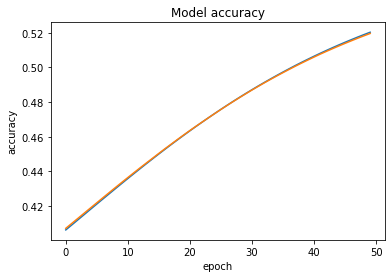

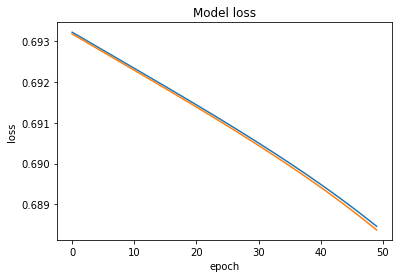

In [7]:
plot_history(history)

0.11370092


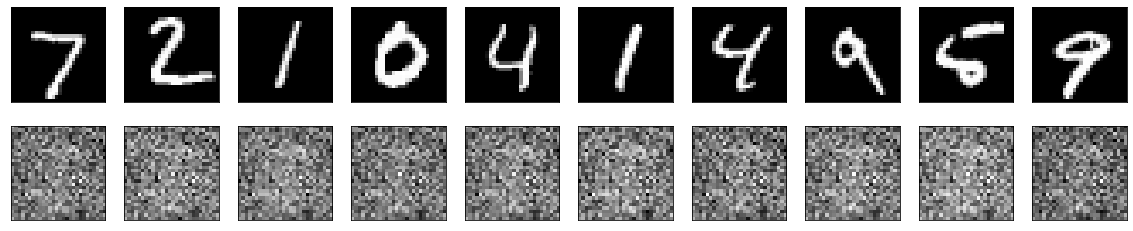

In [8]:
visualize_predictions(ae, encoder)